In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import cv2 
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, feature, data, color, exposure, transform
from sklearn.model_selection import train_test_split


In [2]:
image_labels = pd.read_csv('dance_label.txt', sep=' ', header=None, names=['image', 'label'])
image_labels = image_labels.to_numpy()
np.unique(image_labels[:, 1], return_counts=True)

(array([0, 1, 2, 3], dtype=object), array([2079,  103,  109,  106]))

In [3]:
# Fake data creation
joints = 200 * np.random.rand(len(image_labels), 50)
joints

array([[ 26.99208227,  11.46530487,  29.72353423, ..., 113.15787574,
        187.71356322, 100.34769818],
       [176.85568351,  22.58102025, 177.14968446, ...,  49.94891515,
         96.32095759, 122.9781484 ],
       [ 90.91679207, 183.11356028, 134.48432714, ...,  12.13456855,
        159.57681473,  59.55993939],
       ...,
       [ 54.13958843,  81.93234788,   8.76366028, ...,  55.66231222,
        116.11597329, 116.3678248 ],
       [ 57.54105658,  28.61371889,  78.23383471, ...,  56.55079011,
        159.64501554,  66.42142734],
       [163.9809033 ,  66.06300884,  25.83566642, ..., 151.37837732,
        155.2590807 , 125.07690664]])

In [4]:
X = []
for i, (image, label) in enumerate(image_labels):
    joints = np.zeros(50)
    if label == 1:
        joints = 5000 * np.ones(50)
    if label == 2:
        joints = 10000 * np.ones(50)
    if label == 3:
        joints = 25000 * np.ones(50)
    
    X.append({'image': image, 'label': label, 'joints': joints})
X = np.array(X)
X

array([{'image': 'CorbinHolooway1_1.jpg', 'label': 0, 'joints': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}                                                           ,
       {'image': 'CorbinHolooway1_2.jpg', 'label': 0, 'joints': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}                                                           ,
       {'image': 'CorbinHolooway1_3.jpg', 'label': 0, 'joints': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [5]:
# # Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)
X_shuffled = X[indices]
stratify_labels = image_labels[indices, 1]

# Data split ratios
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Split dataset
train_data, temp_data, train_labels, temp_labels = train_test_split(X_shuffled, stratify_labels,
                                                                    test_size=1-train_ratio, stratify=stratify_labels)
validation_data, test_data, validation_labels, test_labels = train_test_split(temp_data,
                                                                              temp_labels,
                                                                              test_size=test_ratio/(test_ratio + validation_ratio),
                                                                              stratify=temp_labels)

In [6]:
print(np.unique(train_labels, return_counts=True))
print(np.unique(validation_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

(array([0, 1, 2, 3], dtype=object), array([1663,   82,   87,   85]))
(array([0, 1, 2, 3], dtype=object), array([208,  10,  11,  11]))
(array([0, 1, 2, 3], dtype=object), array([208,  11,  11,  10]))


In [7]:
def center_at_origin(joints):
    joints = np.array(joints).reshape(25, 2)
    joints[:, 0] -= np.min(joints[:, 0])
    joints[:, 1] -= np.min(joints[:, 1])
    return joints.reshape(50)

In [8]:
def get_XY(data):
    images = []
    X = []
    y = []
    for data_pt in data:
        images.append(data_pt['image'])
        # center_at_origin(data_pt['joints'])
        X.append(data_pt['joints'])
        y.append(data_pt['label'])
    return images, np.array(X), np.array(y)

train_images, X_train, y_train = get_XY(train_data)
validation_images, X_validation, y_validation = get_XY(validation_data)
test_images, X_test, y_test = get_XY(test_data)

In [9]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.animation as animation

# img = []
# frames = [] # for storing the generated images
# fig = plt.figure()
# for i in range(6):
#     frames.append([plt.imshow(img[i], cmap=cm.Greys_r,animated=True)])

# ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)
# ani.save('movie.mp4')
# plt.show()


# # importing matplot lib
# import matplotlib.pyplot as plt
# import numpy as np
 
# # importing movie py libraries
# from moviepy.editor import VideoClip
# from moviepy.video.io.bindings import mplfig_to_npimage
 
# # numpy array
# x = np.linspace(-2, 2, 200)
 
# # duration of the video
# duration = 2
 
# # matplot subplot
# fig, ax = plt.subplots()
 
# # method to get frames
# def make_frame(t):
     
#     # clear
#     ax.clear()
     
#     # plotting line
#     ax.plot(x, np.sinc(x**2) + np.sin(x + 2 * np.pi / duration * t), lw = 3)
#     ax.set_ylim(-1.5, 2.5)
     
#     # returning numpy image
#     return mplfig_to_npimage(fig)
 
# # creating animation
# animation = VideoClip(make_frame, duration = duration)
 
# # displaying animation with auto play and looping
# animation.ipython_display(fps = 20, loop = True, autoplay = True)

import os
import moviepy.video.io.ImageSequenceClip
image_folder='folder_with_images'
fps=1

image_files = [os.path.join(image_folder,img)
               for img in os.listdir(image_folder)
               if img.endswith(".png")]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('my_video.mp4')

ModuleNotFoundError: No module named 'moviepy'

In [10]:
def create_classification_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Adding dropout for regularization
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')  # Output layer with 4 units for 4 labels
    ])
    return model

# Define the input shape
input_shape = (50,)

# Create the model
model = create_classification_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6528      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 15,044
Trainable params: 15,044
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/100


2024-03-20 19:30:30.694609: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


60/60 [==============================] - 0s 2ms/step - loss: 421.4662 - accuracy: 0.8925 - val_loss: 87.6786 - val_accuracy: 0.9125
Epoch 2/100
60/60 [==============================] - 0s 917us/step - loss: 156.6602 - accuracy: 0.9082 - val_loss: 42.9068 - val_accuracy: 0.9125
Epoch 3/100
60/60 [==============================] - 0s 982us/step - loss: 97.7832 - accuracy: 0.9098 - val_loss: 48.1961 - val_accuracy: 0.9125
Epoch 4/100
60/60 [==============================] - 0s 1ms/step - loss: 55.4687 - accuracy: 0.9129 - val_loss: 17.8124 - val_accuracy: 0.9125
Epoch 5/100
60/60 [==============================] - 0s 1ms/step - loss: 44.7870 - accuracy: 0.9118 - val_loss: 35.0971 - val_accuracy: 0.9125
Epoch 6/100
60/60 [==============================] - 0s 1ms/step - loss: 31.3801 - accuracy: 0.9113 - val_loss: 8.5784 - val_accuracy: 0.9125
Epoch 7/100
60/60 [==============================] - 0s 1ms/step - loss: 20.5093 - accuracy: 0.9139 - val_loss: 23.1931 - val_accuracy: 0.9125
Epoch 

In [18]:
classifications = ['None', 'Grand Jete', 'Arabesque', 'Passe']
def visualize_results(type: str, num_visualize=10, random_visualize=False):
    if type == "test":
        X = X_test
        images = test_images
        y = y_test
    elif type == "validation":
        X = X_validation
        images = validation_images
        y = y_validation
    elif type == "training":
        X = X_train
        images = train_images
        y = y_train

    if random_visualize:
        indices = np.random.permutation(len(X))[:num_visualize]
    else:
        indices = np.arange(num_visualize)

    y_est = model.predict(X)

    # print(y_true.shape)
    for i in indices:
        print(images[i])
        classification = y_est[i]
        print("classified as", classifications[np.argmax(classification)])
        img = io.imread(f"dance_images/{images[i]}")
        plt.imshow(img, cmap='gray')
        plt.axis('off')  # Turn off axis labels
        plt.text(0.5, -0.1, classifications[np.argmax(classification)], ha='center', va='center', transform=plt.gca().transAxes)
        plt.show()

8/8 [==============================] - 0s 782us/step
TomokaSato_120.jpg
classified as None


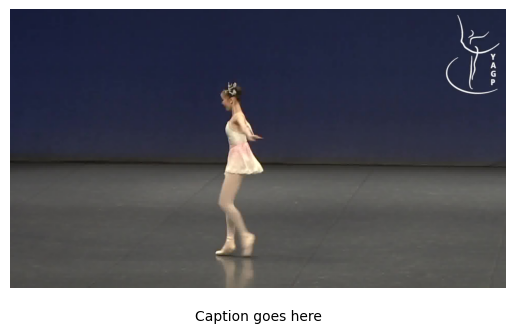

JuaKim_156.jpg
classified as Arabesque


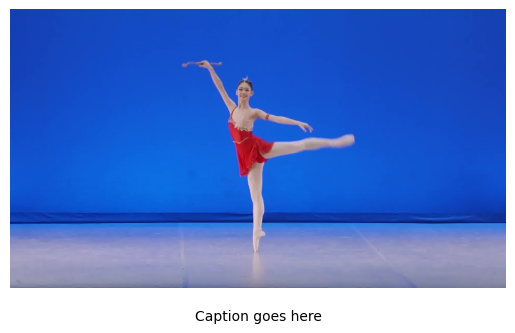

ShogoHayami_25.jpg
classified as None


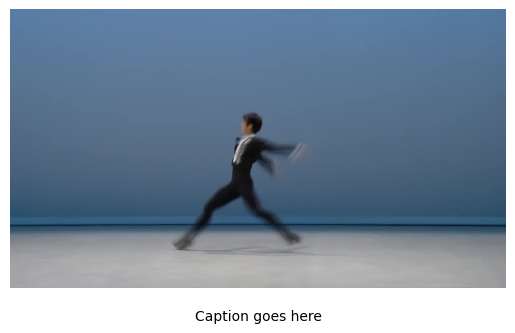

BalletClass_32.jpg
classified as None


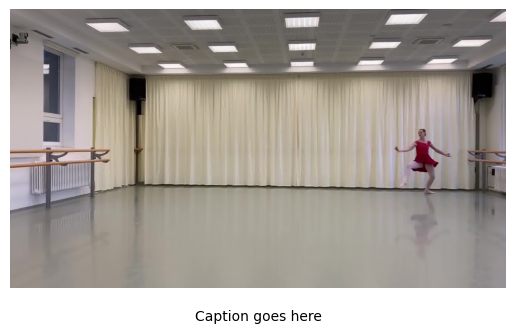

JohnCrim_26.jpg
classified as None


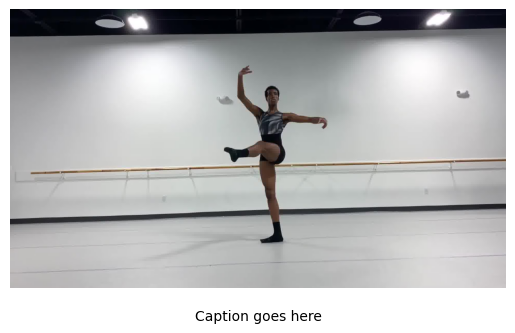

SemyonChudin_178.jpg
classified as None


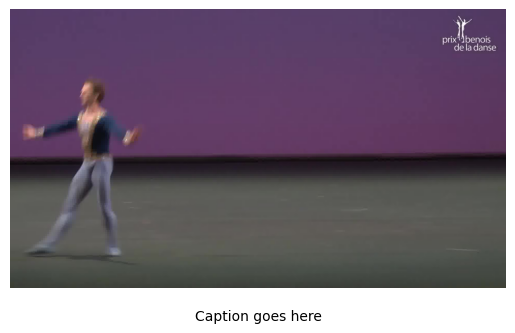

RyanLenkey_54.jpg
classified as None


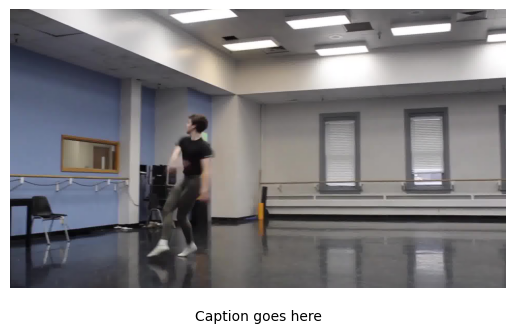

JohnCrim_172.jpg
classified as None


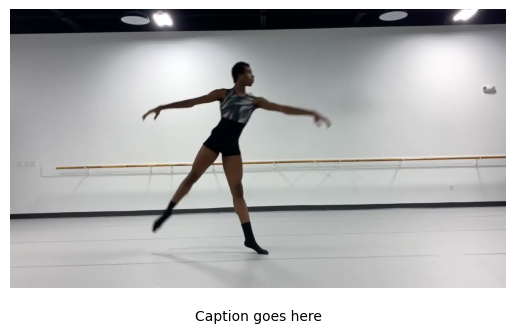

BridgetWilde_88.jpg
classified as None


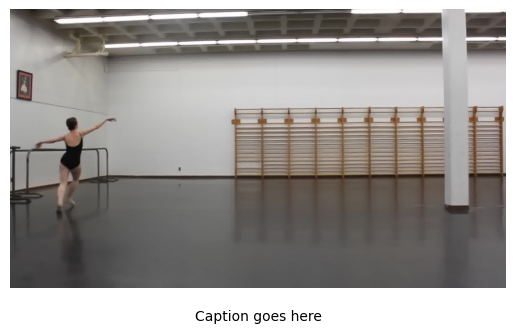

RyanLenkey_76.jpg
classified as None


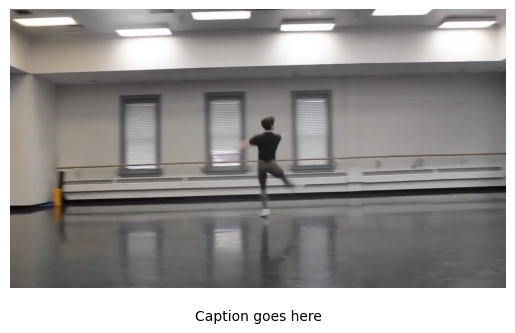

In [19]:
visualize_results("test", random_visualize=True)

In [ ]:

# Split data into training, validation, and test sets
# total_samples = len(X_shuffled)
# train_split = int(0.8 * total_samples)
# val_split = int(0.9 * total_samples)

# X_train, y_train = X_shuffled[:train_split], y_shuffled[:train_split]
# X_val, y_val = X_shuffled[train_split:val_split], y_shuffled[train_split:val_split]
# X_test, y_test = X_shuffled[val_split:], y_shuffled[val_split:]

# # Batch and shuffle the training data
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=len(X_train)).batch(32)

# # Batch the validation data (no need to shuffle)
# val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

# # Batch the test data (no need to shuffle)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [ ]:
# protoFile = "models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
# weightsFile = "models/pose/mpi/pose_iter_160000.caffemodel"
# net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile) 
# # Read image 
# frame = cv2.imread("dance_images/AlexandraLamm_10.jpg") 
  
# # Specify the input image dimensions 
# inWidth = 368
# inHeight = 368
  
# # Prepare the frame to be fed to the network 
# inpBlob = cv2.dnn.blobFromImage( 
#     frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False) 
  
# # Set the prepared object as the input blob of the network 
# net.setInput(inpBlob) 
# output = net.forward() 
# output.shape
# H = output.shape[2] 
# W = output.shape[3] 
# # Empty list to store the detected keypoints 
# points = [] 
# for i in range(output.shape[1]): 
#     # confidence map of corresponding body's part. 
#     probMap = output[0, i, :, :] 
  
#     # Find global maxima of the probMap. 
#     minVal, prob, minLoc, point = cv2.minMaxLoc(probMap) 
  
#     # Scale the point to fit on the original image 
#     x = (frame.shape[1] * point[0]) / W 
#     y = (frame.shape[1] * point[1]) / H 
  
#     if prob > 0.8: 
#         cv2.circle(frame, (int(x), int(y)), 15, (0, 255, 255), 
#                    thickness=-1, lineType=cv2.FILLED) 
#         cv2.putText(frame, "{}".format(i), (int(x), int( 
#             y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA) 
  
#         # Add the point to the list if the probability is greater than the threshold 
#         points.append((int(x), int(y))) 
#     else: 
#         points.append(None)

# plt.imshow(frame)
# plt.show()